# Binary Classification of banks churns dataset

In [124]:
# import the labraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,f1_score,precision_score,recall_score
from sklearn.metrics import classification_report


# load the dataset

In [125]:
#Load the dataset
df=pd.read_csv('train.csv')
df_test=pd.read_csv('test.csv')
sub=pd.read_csv('sample_submission.csv')

In [126]:
df.head() # this function first fives lines of the dataset

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,15674932,Okwudilichukwu,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97,0
1,1,15749177,Okwudiliolisa,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50,0
2,2,15694510,Hsueh,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69,0
3,3,15741417,Kao,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,0
4,4,15766172,Chiemenam,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83,0


In [127]:
df_test.head() # this function gives the last fives lines of the dataset

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,165034,15773898,Lucchese,586,France,Female,23.0,2,0.00,2,0.0,1.0,160976.75
1,165035,15782418,Nott,683,France,Female,46.0,2,0.00,1,1.0,0.0,72549.27
2,165036,15807120,K?,656,France,Female,34.0,7,0.00,2,1.0,0.0,138882.09
3,165037,15808905,O'Donnell,681,France,Male,36.0,8,0.00,1,1.0,0.0,113931.57
4,165038,15607314,Higgins,752,Germany,Male,38.0,10,121263.62,1,1.0,0.0,139431.00


In [128]:
sub.head()

,id,Exited
0,165034,0.5
1,165035,0.5
2,165036,0.5
3,165037,0.5
4,165038,0.5


In [129]:
df.info() #this function gives the information about the dataset 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165034 entries, 0 to 165033
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   id               165034 non-null  int64  
 1   CustomerId       165034 non-null  int64  
 2   Surname          165034 non-null  object 
 3   CreditScore      165034 non-null  int64  
 4   Geography        165034 non-null  object 
 5   Gender           165034 non-null  object 
 6   Age              165034 non-null  float64
 7   Tenure           165034 non-null  int64  
 8   Balance          165034 non-null  float64
 9   NumOfProducts    165034 non-null  int64  
 10  HasCrCard        165034 non-null  float64
 11  IsActiveMember   165034 non-null  float64
 12  EstimatedSalary  165034 non-null  float64
 13  Exited           165034 non-null  int64  
dtypes: float64(5), int64(6), object(3)
memory usage: 17.6+ MB


# Checks the unique values

In [130]:
for col in df.columns:
    print(f"Unique values in {col}: {df[col].unique()}") # check the unique valuues of every column 

Unique values in id: [     0      1      2 ... 165031 165032 165033]
Unique values in CustomerId: [15674932 15749177 15694510 ... 15673571 15692656 15815050]
Unique values in Surname: ['Okwudilichukwu' 'Okwudiliolisa' 'Hsueh' ... 'Aliyev' 'McMinn' 'Elkins']
Unique values in CreditScore: [668 627 678 581 716 588 593 676 583 599 687 759 681 703 549 602 636 645
 559 773 554 553 714 616 586 785 834 632 746 797 753 749 413 611 752 551
 747 683 684 696 591 488 685 579 607 742 677 461 634 647 577 809 686 633
 494 699 663 756 648 563 682 620 721 652 535 584 701 640 711 707 631 637
 622 775 817 592 743 726 431 571 659 639 618 722 712 672 804 730 506 569
 558 507 594 796 615 619 471 434 706 758 762 635 630 709 661 644 731 748
 613 727 649 835 587 765 667 479 850 674 715 655 723 590 539 788 359 660
 517 740 694 578 610 718 705 542 624 601 625 596 770 695 662 567 744 595
 736 724 751 646 670 741 543 754 691 641 679 523 621 589 582 642 600 732
 698 469 525 520 470 692 532 651 605 792 638 671 540 82

In [131]:
df1=df.drop(columns=['Surname','id','CustomerId'],axis=1) #drop the columns
df1

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97,0
1,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50,0
2,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69,0
3,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,0
4,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83,0
...,...,...,...,...,...,...,...,...,...,...,...
165029,667,Spain,Female,33.0,2,0.00,1,1.0,1.0,131834.75,0
165030,792,France,Male,35.0,3,0.00,1,0.0,0.0,131834.45,0
165031,565,France,Male,31.0,5,0.00,1,1.0,1.0,127429.56,0
165032,554,Spain,Female,30.0,7,161533.00,1,0.0,1.0,71173.03,0


<Axes: xlabel='Geography', ylabel='count'>

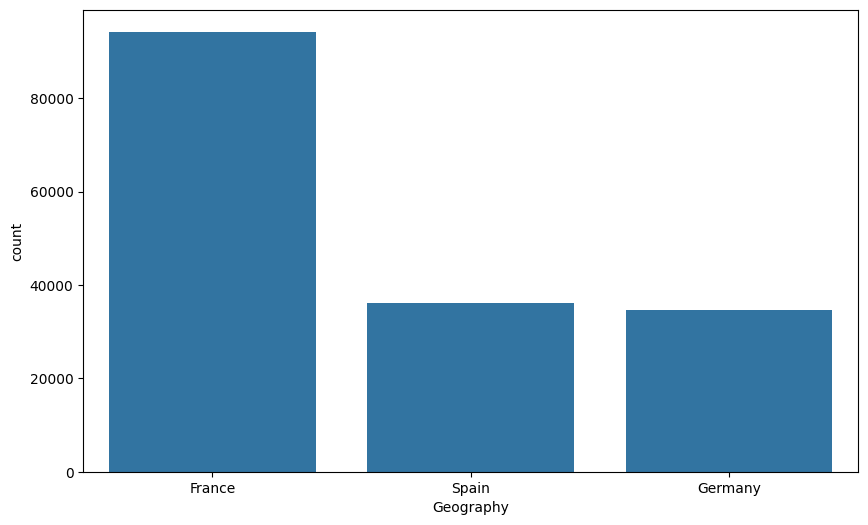

In [132]:
plt.figure(figsize=(10,6))
sns.countplot(data=df1,x='Geography')


<Axes: xlabel='EstimatedSalary', ylabel='Count'>

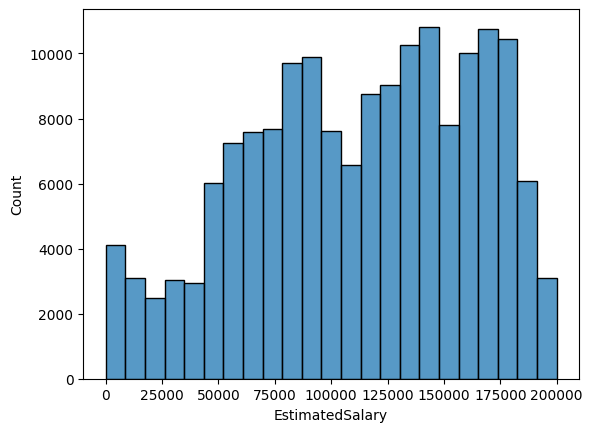

In [133]:
sns.histplot(data=df1,x='EstimatedSalary',bins=23)

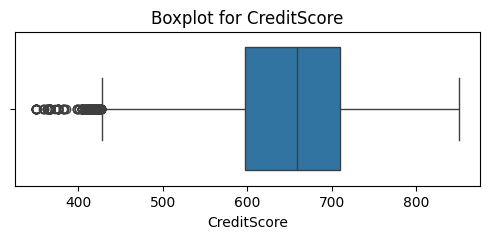

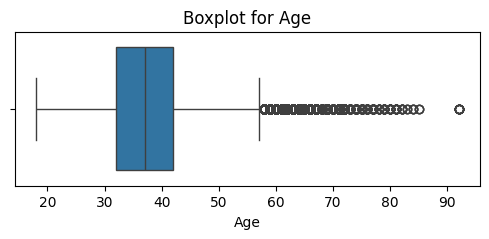

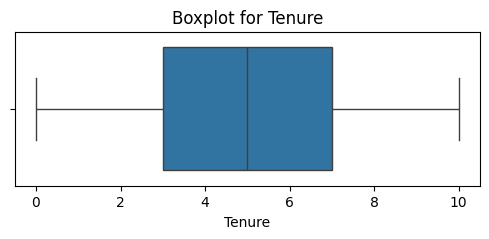

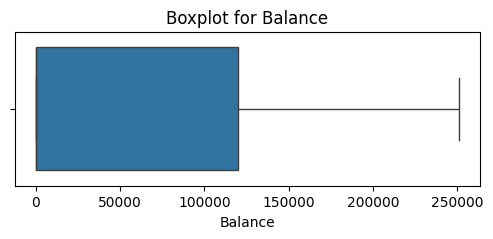

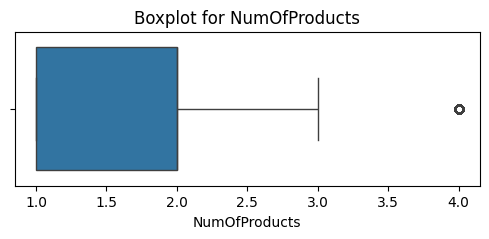

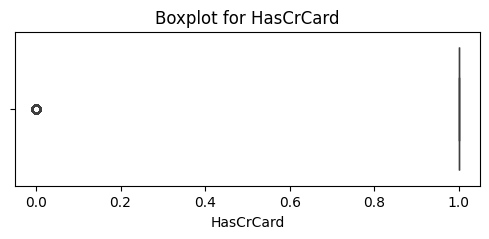

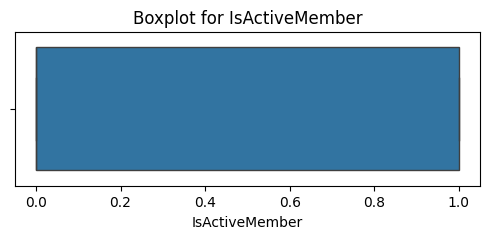

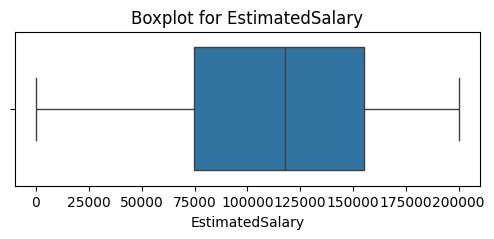

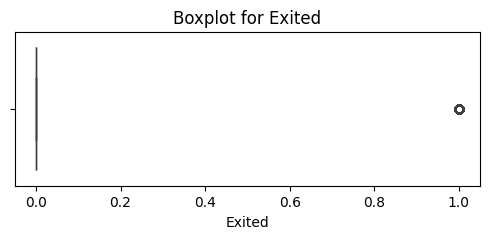

In [134]:
import seaborn as sns
import matplotlib.pyplot as plt

# For all numeric columns
for col in df1.select_dtypes(include='number').columns:
    plt.figure(figsize=(6, 2))
    sns.boxplot(x=df1[col])
    plt.title(f'Boxplot for {col}')
    plt.show()

<Axes: xlabel='Exited', ylabel='count'>

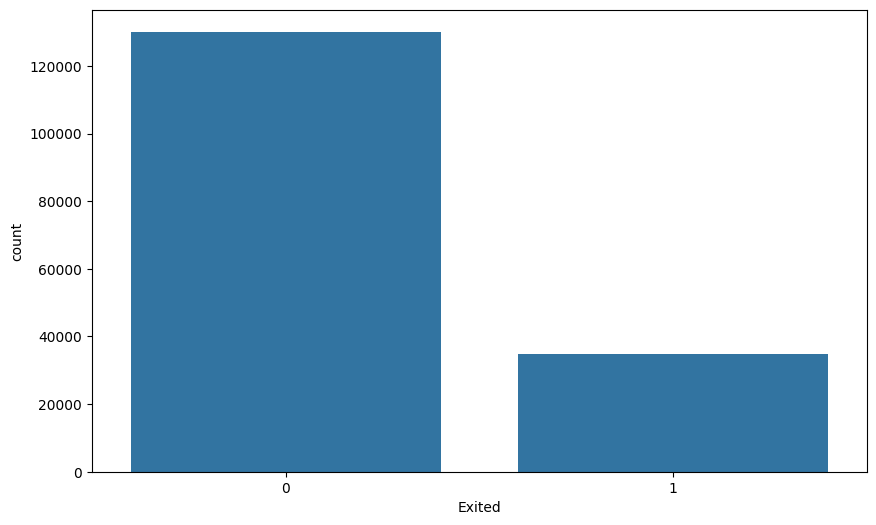

In [135]:
plt.figure(figsize=(10,6))
sns.countplot(data=df1,x='Exited' )


<Axes: xlabel='Age', ylabel='Count'>

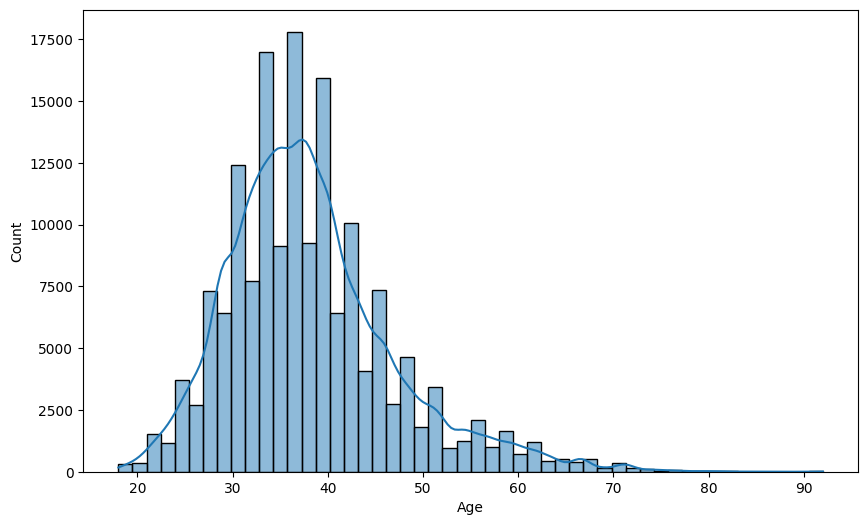

In [136]:
plt.figure(figsize=(10,6))
sns.histplot(data=df1,x='Age',bins=50,kde='True')


<Axes: xlabel='Exited', ylabel='Age'>

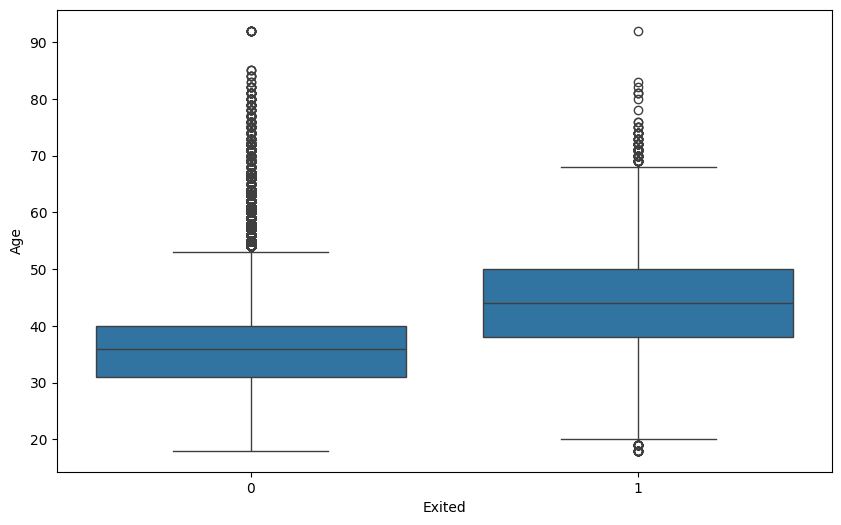

In [137]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df1,x='Exited' ,y='Age')


<Axes: xlabel='Geography', ylabel='count'>

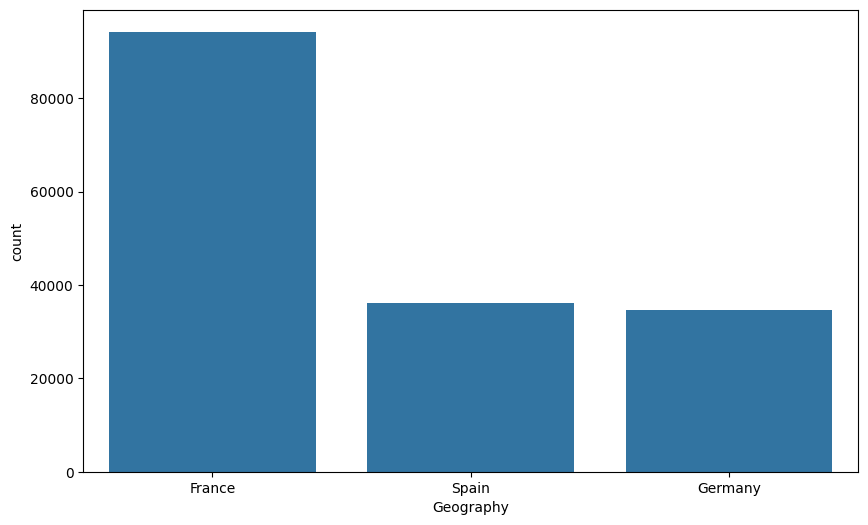

In [138]:
plt.figure(figsize=(10,6))
sns.countplot(data=df1,x='Geography')


In [139]:
df1.describe()


,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000
mean,656.454373,38.125888,5.020353,55478.086689,1.554455,0.753954,0.497770,112574.822734,0.211599
std,80.103340,8.867205,2.806159,62817.663278,0.547154,0.430707,0.499997,50292.865585,0.408443
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,11.580000,0.000000
25%,597.000000,32.000000,3.000000,0.000000,1.000000,1.000000,0.000000,74637.570000,0.000000
50%,659.000000,37.000000,5.000000,0.000000,2.000000,1.000000,0.000000,117948.000000,0.000000
75%,710.000000,42.000000,7.000000,119939.517500,2.000000,1.000000,1.000000,155152.467500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.000000,1.000000,199992.480000,1.000000


# Handle outliers

In [140]:
df1.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')

<Axes: ylabel='CreditScore'>

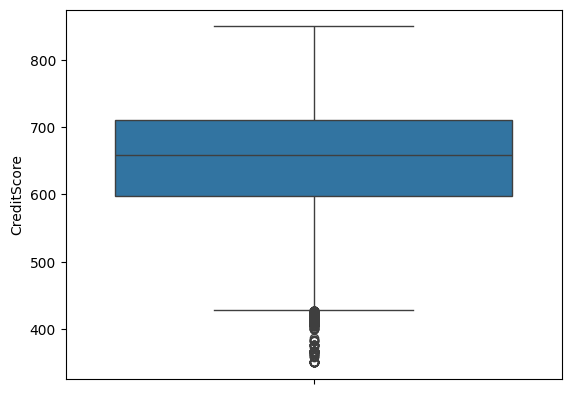

In [141]:
# we make the boxplot and check the outliers
sns.boxplot(df1['CreditScore'])

In [142]:
#  we can handle the outliers by IQR method  and one by one
Q1 = df1['CreditScore'].quantile(0.25)
Q3 = df1['CreditScore'].quantile(0.75)
IQR = Q3 - Q1

lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

print("Lower Limit:", lower_limit)
print("Upper Limit:", upper_limit)

# Cap outliers (recommended)
df1['CreditScore'] = np.where(df1['CreditScore'] < lower_limit, lower_limit,
                                  np.where(df1['CreditScore'] > upper_limit, upper_limit, df1['CreditScore']))


Lower Limit: 427.5
Upper Limit: 879.5


<Axes: ylabel='CreditScore'>

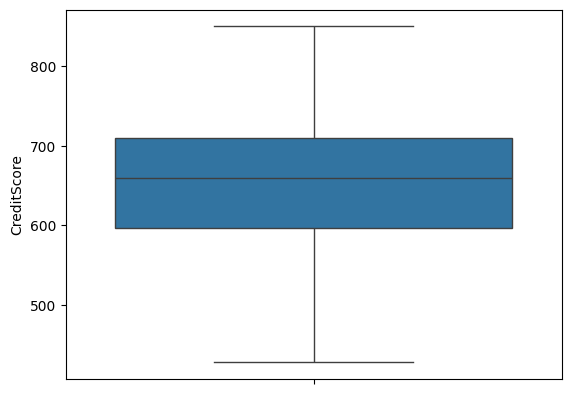

In [143]:
sns.boxplot(df1['CreditScore'])

<Axes: ylabel='Age'>

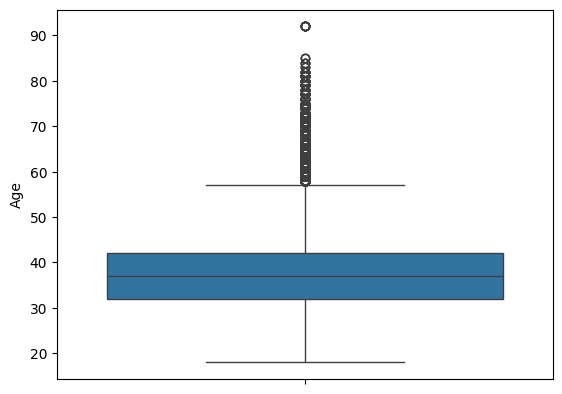

In [144]:
sns.boxplot(df1['Age'])

In [145]:
#  we can handle the outliers by IQR method  and one by one
Q1 = df1['Age'].quantile(0.25)
Q3 = df1['Age'].quantile(0.75)
IQR = Q3 - Q1

lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

print("Lower Limit:", lower_limit)
print("Upper Limit:", upper_limit)

# Cap outliers (recommended)
df1['Age'] = np.where(df1['Age'] < lower_limit, lower_limit,
                                  np.where(df1['Age'] > upper_limit, upper_limit, df1['Age']))


Lower Limit: 17.0
Upper Limit: 57.0


<Axes: ylabel='Age'>

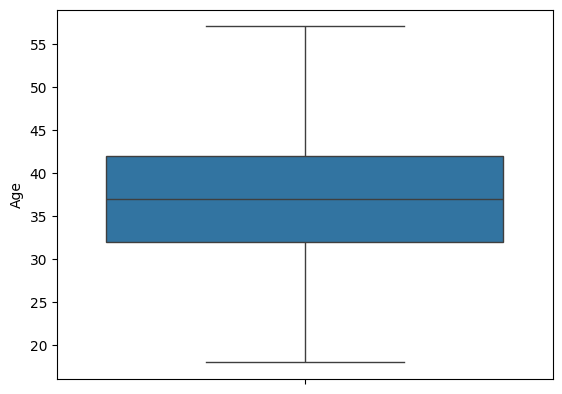

In [146]:
sns.boxplot(df1['Age'])

<Axes: ylabel='NumOfProducts'>

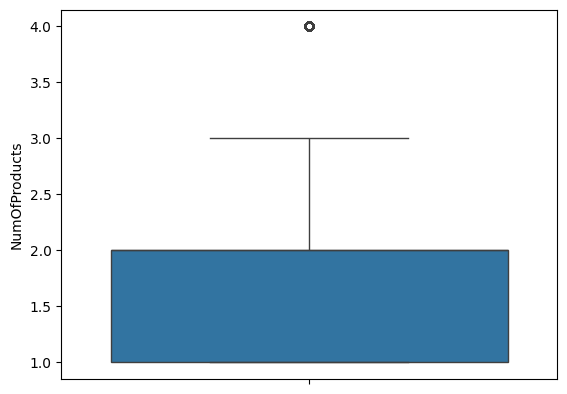

In [147]:
sns.boxplot(df1['NumOfProducts'])

In [149]:
#  we can handle the outliers by IQR method  and one by one
Q1 = df1['NumOfProducts'].quantile(0.25)
Q3 = df1['NumOfProducts'].quantile(0.75)
IQR = Q3 - Q1

lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

print("Lower Limit:", lower_limit)
print("Upper Limit:", upper_limit)

# Cap outliers (recommended)
df1['NumOfProducts'] = np.where(df1['NumOfProducts'] < lower_limit, lower_limit,
                                  np.where(df1['NumOfProducts'] > upper_limit, upper_limit, df1['NumOfProducts']))


Lower Limit: -0.5
Upper Limit: 3.5


<Axes: ylabel='NumOfProducts'>

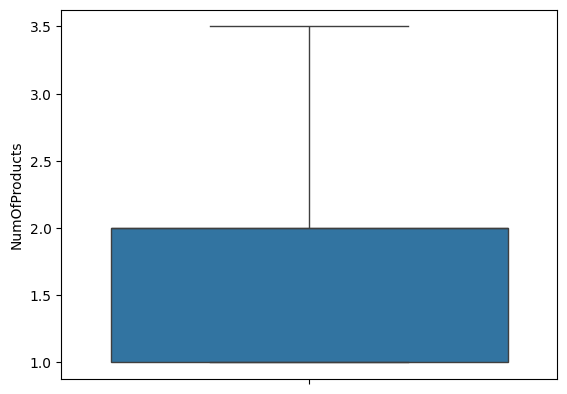

In [150]:
sns.boxplot(df1['NumOfProducts'])

<Axes: ylabel='HasCrCard'>

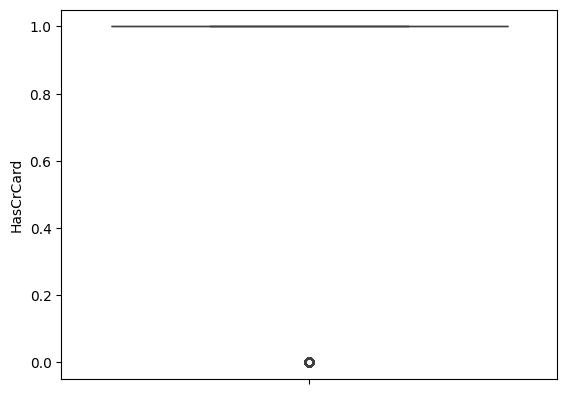

In [151]:
sns.boxplot(df1['HasCrCard'])

In [152]:
#  we can handle the outliers by IQR method  and one by one
Q1 = df1['HasCrCard'].quantile(0.25)
Q3 = df1['HasCrCard'].quantile(0.75)
IQR = Q3 - Q1

lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

print("Lower Limit:", lower_limit)
print("Upper Limit:", upper_limit)

# Cap outliers (recommended)
df1['HasCrCard'] = np.where(df1['HasCrCard'] < lower_limit, lower_limit,
                                  np.where(df1['HasCrCard'] > upper_limit, upper_limit, df1['HasCrCard']))


Lower Limit: 1.0
Upper Limit: 1.0


<Axes: ylabel='HasCrCard'>

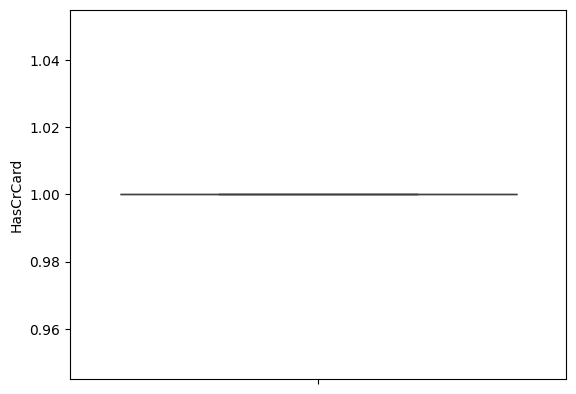

In [153]:
sns.boxplot(df1['HasCrCard'])

In [154]:
from sklearn.preprocessing import LabelEncoder
cols_to_encode = ['Gender', 'Geography']

# Create the encoder
le = LabelEncoder()

# Apply to each selected column
for col in cols_to_encode:
    df1[col] = le.fit_transform(df1[col])

In [155]:
df1.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,668.0,0,1,33.0,3,0.00,2.0,1.0,0.0,181449.97,0
1,627.0,0,1,33.0,1,0.00,2.0,1.0,1.0,49503.50,0
2,678.0,0,1,40.0,10,0.00,2.0,1.0,0.0,184866.69,0
3,581.0,0,1,34.0,2,148882.54,1.0,1.0,1.0,84560.88,0
4,716.0,2,1,33.0,5,0.00,2.0,1.0,1.0,15068.83,0


In [156]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165034 entries, 0 to 165033
Data columns (total 11 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   CreditScore      165034 non-null  float64
 1   Geography        165034 non-null  int32  
 2   Gender           165034 non-null  int32  
 3   Age              165034 non-null  float64
 4   Tenure           165034 non-null  int64  
 5   Balance          165034 non-null  float64
 6   NumOfProducts    165034 non-null  float64
 7   HasCrCard        165034 non-null  float64
 8   IsActiveMember   165034 non-null  float64
 9   EstimatedSalary  165034 non-null  float64
 10  Exited           165034 non-null  int64  
dtypes: float64(7), int32(2), int64(2)
memory usage: 12.6 MB


# Checks the missing values

In [157]:
df1.isnull().sum() # check the null values

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

# Split_data

In [158]:
# Convert the data into X and y
from sklearn.preprocessing import StandardScaler
X=df1.drop('Exited',axis=1)
scaler=StandardScaler()
X=scaler.fit_transform(X)
y=df1['Exited']


In [159]:

from sklearn.model_selection import train_test_split

# Assuming X is your features and y is your target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [160]:
from imblearn.over_sampling import SMOTE

sm = SMOTE()
X_resampled, y_resampled = sm.fit_resample(X_train, y_train)


# Train _model

In [161]:
from xgboost import XGBClassifier
xgb=XGBClassifier()
xgb.fit(X_resampled, y_resampled)

pre=xgb.predict(X_test)

from sklearn.metrics import accuracy_score,precision_score,f1_score
print('accuracy_score:',accuracy_score(y_test,pre))
print('precision_score:',precision_score(y_test,pre))
print('f1_score:',f1_score(y_test,pre))

accuracy_score: 0.8583027842578846
precision_score: 0.6709183673469388
f1_score: 0.6565827153241794


In [162]:
model=LogisticRegression()
model.fit(X_train,y_train)

pred=model.predict(X_test)

from sklearn.metrics import accuracy_score,precision_score,f1_score
print('accuracy_score:',accuracy_score(y_test,pred))
print('precision_score:',precision_score(y_test,pred))
print('f1_score:',f1_score(y_test,pred))

accuracy_score: 0.8339443148423061
precision_score: 0.6901444788441693
f1_score: 0.49395254362478075


In [ ]:
from sklearn.ensemble import RandomForestClassifier

model1 = RandomForestClassifier(
    n_estimators=50,      # Reduce number of trees
    max_depth=10,         # Limit tree depth
    n_jobs=-1,            # Use all CPU cores
    random_state=42
)

model1.fit(X_train, y_train)

pred1=model1.predict(X_test)

from sklearn.metrics import accuracy_score,precision_score,f1_score
print('accuracy_score:',accuracy_score(y_test,pred1))
print('precision_score:',precision_score(y_test,pred1))
print('f1_score:',f1_score(y_test,pred1))


In [268]:
pred1=model1.predict(X_test)
pred1

array([0, 0, 1, ..., 0, 0, 0], shape=(33007,))

In [269]:
from sklearn.metrics import accuracy_score,precision_score,f1_score
print('accuracy_score:',accuracy_score(y_test,pred1))
print('precision_score:',precision_score(y_test,pred1))
print('f1_score:',f1_score(y_test,pred1))

accuracy_score: 0.8646650710455358
precision_score: 0.7579842389050186
f1_score: 0.6207013670714103


In [270]:
model2= DecisionTreeClassifier(
    criterion='gini',           # or 'entropy'
    max_depth=10,               # try None for no limit
    min_samples_split=5,
    min_samples_leaf=2,
    max_features='sqrt',        # or None
    class_weight='balanced',    # handles imbalance
    random_state=42
)

model2.fit(X_train, y_train)


DecisionTreeClassifier(class_weight='balanced', max_depth=10,
                       max_features='sqrt', min_samples_leaf=2,
                       min_samples_split=5, random_state=42)

In [271]:
pred2=model2.predict(X_test)
pred2

array([0, 0, 1, ..., 1, 0, 0], shape=(33007,))

In [184]:
from sklearn.metrics import accuracy_score,precision_score,f1_score
print('accuracy_score:',accuracy_score(y_test,pred2))
print('precision_score:',precision_score(y_test,pred2))
print('f1_score:',f1_score(y_test,pred2))

accuracy_score: 0.7996644998951562
precision_score: 0.49510070767555797
f1_score: 0.6036671368124118


In [ ]:
from xgboost import XGBClassifier
